> 这一个脚本的主要目的是，对L1的表达特征进行计数；即具有怎样性质的L1是表达出来的；
> 我们前面已经对L1的结构进行了一个基本的分类，现在就是去看这个东西；

In [88]:
gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/hg38_rmsk_TE.gtf.locInd.locations",header=T)

In [89]:
head(gtf)

,TE,chromsome.start.stop.strand
,<chr>,<chr>
1,L1M2_dup229,chr1:100000001-100000637:-
2,AluSx3_dup157,chr1:10000002-10000239:+
3,L1M2_dup230,chr1:100000744-100002612:-
4,AluSx_dup700,chr1:10000251-10000566:+
5,AluJr_dup3513,chr1:100002613-100002913:-
6,L1M2_dup231,chr1:100002914-100003133:-


In [90]:
colnames(gtf)<-c("transcriptID","location")

In [91]:
structure<-read.table("/home/xxzhang/workplace/software/ORFFinder/data_ext8_ordered.final.txt",header=T)

In [92]:
dim(structure)

[1] 12175    20

In [93]:
head(structure)

,subfamily,chromsome,start,stop,strand,Length,orf.start,orf.end,X.identity,alignment.length,mismatches,gap.opens,q.start,q.end,s.start,s..end,ORF,label,class,label2
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,L1HS,chr1,103922066,103925398,+,3332,420,1334,96.831,915,29,0,1,915,103,1017,ORF1,chr1:103922066-103925398(+),ORF1,chr1:103922066-103925398:+
2,L1HS,chr1,104770248,104776278,-,6030,907,1923,98.230,1017,18,0,1,1017,1,1017,ORF1,chr1:104770248-104776278(-),ORF1-ORF2,chr1:104770248-104776278:-
3,L1HS,chr1,104770248,104776278,-,6030,2281,5814,98.387,3534,57,0,1,3534,295,3828,ORF2,chr1:104770248-104776278(-),ORF1-ORF2,chr1:104770248-104776278:-
4,L1HS,chr1,104843834,104849864,-,6030,1986,5813,NA,NA,NA,NA,NA,NA,NA,NA,ORF2,chr1:104843834-104849864(-),ORF2,chr1:104843834-104849864:-
5,L1HS,chr1,113341608,113345790,+,4182,1150,3962,NA,NA,NA,NA,NA,NA,NA,NA,ORF2,chr1:113341608-113345790(+),ORF2,chr1:113341608-113345790:+
6,L1HS,chr1,113497221,113500000,+,2779,885,1901,97.837,1017,22,0,1,1017,1,1017,ORF1,chr1:113497221-113500000(+),ORF1-ORF2,chr1:113497221-113500000:+


In [94]:
#现在有点想要删掉，也不用删掉，structure这个数据集中真正对我们有用的两列是最后两列；
structure2<-unique(structure[,c(20,1,19)])

In [95]:
dim(structure2)

[1] 11160     3

In [96]:
head(structure2)

,label2,subfamily,class
,<chr>,<chr>,<chr>
1,chr1:103922066-103925398:+,L1HS,ORF1
2,chr1:104770248-104776278:-,L1HS,ORF1-ORF2
4,chr1:104843834-104849864:-,L1HS,ORF2
5,chr1:113341608-113345790:+,L1HS,ORF2
6,chr1:113497221-113500000:+,L1HS,ORF1-ORF2
8,chr1:113500001-113503257:+,L1HS,ORF2


In [97]:
colnames(structure2)[1]<-c("location")

In [98]:
#将两个数据集merge
annotationDat<-merge(gtf,structure2,by="location",all=TRUE)

In [99]:
head(annotationDat)

,location,transcriptID,subfamily,class
,<chr>,<chr>,<chr>,<chr>
1,chr1_GL383518v1_alt:1-100:+,AluJo_dup78168,NA,NA
2,chr1_GL383518v1_alt:100662-100869:-,L1MB7_dup22832,NA,NA
3,chr1_GL383518v1_alt:100870-101167:-,AluSc8_dup21953,NA,NA
4,chr1_GL383518v1_alt:101168-101220:-,L1MB7_dup22833,NA,NA
5,chr1_GL383518v1_alt:101226-101443:-,AluJb_dup126187,NA,NA
6,chr1_GL383518v1_alt:10134-10440:-,AluSq2_dup61023,NA,NA


In [100]:
annotationDat[is.na(annotationDat$class),]$class<-"not-enough-length"

In [101]:
head(annotationDat) #这个annotationDat就是我们想要的往下去做的结构；

,location,transcriptID,subfamily,class
,<chr>,<chr>,<chr>,<chr>
1,chr1_GL383518v1_alt:1-100:+,AluJo_dup78168,NA,not-enough-length
2,chr1_GL383518v1_alt:100662-100869:-,L1MB7_dup22832,NA,not-enough-length
3,chr1_GL383518v1_alt:100870-101167:-,AluSc8_dup21953,NA,not-enough-length
4,chr1_GL383518v1_alt:101168-101220:-,L1MB7_dup22833,NA,not-enough-length
5,chr1_GL383518v1_alt:101226-101443:-,AluJb_dup126187,NA,not-enough-length
6,chr1_GL383518v1_alt:10134-10440:-,AluSq2_dup61023,NA,not-enough-length


In [31]:
expression<-read.table("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/TE.cntTable",header=T)

head(expression)

In [103]:
library(dplyr) #loading packages
library(ggplot2)
library(tidyr)

In [34]:
ExtensionDat<- expression %>% separate(gene.TE, c("transcriptID","gene","family","class"),sep = ":")
FilterDat<-ExtensionDat
colnames(FilterDat)[5:13]<-c("ESC-1","ESC-2","ESC-3","Neuron-1","Neuron-2",
            "Neuron-3","Neuron_pro-1","Neuron_pro-2","Neuron_pro-3")


In [37]:
head(annotationDat)

,location,transcriptID,subfamily,class
,<chr>,<chr>,<chr>,<chr>
1,chr1_GL383518v1_alt:1-100:+,AluJo_dup78168,NA,not-enough-length
2,chr1_GL383518v1_alt:100662-100869:-,L1MB7_dup22832,NA,not-enough-length
3,chr1_GL383518v1_alt:100870-101167:-,AluSc8_dup21953,NA,not-enough-length
4,chr1_GL383518v1_alt:101168-101220:-,L1MB7_dup22833,NA,not-enough-length
5,chr1_GL383518v1_alt:101226-101443:-,AluJb_dup126187,NA,not-enough-length
6,chr1_GL383518v1_alt:10134-10440:-,AluSq2_dup61023,NA,not-enough-length


In [38]:
head(FilterDat)

,transcriptID,gene,family,class,ESC-1,ESC-2,ESC-3,Neuron-1,Neuron-2,Neuron-3,Neuron_pro-1,Neuron_pro-2,Neuron_pro-3
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,(CATTC)n,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,2
2,(CATTC)n_dup10,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,0
3,(CATTC)n_dup11,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,0
4,(CATTC)n_dup12,(CATTC)n,Satellite,Satellite,1,0,0,0,0,0,0,0,0
5,(CATTC)n_dup13,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,0
6,(CATTC)n_dup14,(CATTC)n,Satellite,Satellite,0,0,0,1,0,0,0,0,1


In [51]:
#table(FilterDat$family)

In [42]:
FilterDat2<-FilterDat[FilterDat$family=="L1",] #表达的结果中仅仅考虑L1

In [43]:
StructureDat<-merge(annotationDat,FilterDat2,by="transcriptID")

In [44]:
head(StructureDat)

,transcriptID,location,subfamily,class.x,gene,family,class.y,ESC-1,ESC-2,ESC-3,Neuron-1,Neuron-2,Neuron-3,Neuron_pro-1,Neuron_pro-2,Neuron_pro-3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,HAL1,chr1:50331337-50332274:+,NA,not-enough-length,HAL1,L1,LINE,0,0,0,0,0,0,0,0,0
2,HAL1_dup1,chr1:114294733-114297115:+,NA,not-enough-length,HAL1,L1,LINE,0,0,0,0,0,0,0,0,0
3,HAL1_dup10,chr1:1130956-1131376:-,NA,not-enough-length,HAL1,L1,LINE,0,0,0,0,0,0,1,0,0
4,HAL1_dup100,chr1:14842757-14843163:-,NA,not-enough-length,HAL1,L1,LINE,0,0,0,0,0,3,0,0,0
5,HAL1_dup1000,chr1:150866514-150866665:+,NA,not-enough-length,HAL1,L1,LINE,0,0,0,0,0,0,0,0,0
6,HAL1_dup10000,chr7:29781941-29781976:+,NA,not-enough-length,HAL1,L1,LINE,0,0,0,0,0,0,0,0,0


In [53]:
CountTable<-StructureDat%>% count(gene,class.x,name = 'count')

In [54]:
head(CountTable)

,gene,class.x,count
,<chr>,<chr>,<int>
1,HAL1,not-enough-length,23462
2,HAL1M8,not-enough-length,2234
3,HAL1ME,not-enough-length,8923
4,HAL1b,not-enough-length,5511
5,L1HS,ORF1,14
6,L1HS,ORF1-ORF2,256


In [56]:
library(RColorBrewer)
colourCount <-  length(unique(CountTable$class.x))

In [72]:
options(repr.plot.width =7, repr.plot.height =20)

In [73]:
p<-ggplot(CountTable, aes(gene,log10(count+1),fill = class.x))+
    geom_col(position = 'stack', width = 0.7) +
    labs(x = '', y = 'Relative Abundance(%)') +
    theme(axis.text = element_text(size = 12), axis.title = element_text(size = 13)) +
    theme(legend.text = element_text(size = 11))+
    theme_classic()+
    scale_fill_manual(values = colorRampPalette(brewer.pal(8, "Set2"))(colourCount))+
    theme(legend.position = "bottom" ,legend.box = "horizontal")+
    coord_flip()
    #scale_fill_manual(values =  rev(c('blue', 'orange', 'green', 'yellow', 'red', 'hotpink', 'cyan','purple', 'burlywood1', 'skyblue', 'gray',
    #                                 "＃A52A2A","＃E9967A","＃FFA07A","＃DAA520","＃F0E68C","＃9ACD32"))) 
#problem occurs in the last sentence;

In [77]:
#p

In [75]:
pdf('L1-count.pdf',width = 7,height = 20)
p
dev.off()

png 
  2

In [78]:
CountTable2<-CountTable%>% filter(gene%in%c("L1HS","L1PA2","L1PA3","L1PA4","L1PA5","L1PA6","L1PA7","L1PA8"))

In [79]:
library(RColorBrewer)
colourCount <-  length(unique(CountTable2$class.x))

In [85]:
options(repr.plot.width =6, repr.plot.height =3)
p<-ggplot(CountTable2, aes(gene,log10(count+1),fill = class.x))+
    geom_col(position = 'stack', width = 0.7) +
    labs(x = '', y = 'log10(count+1)') +
    theme(axis.text = element_text(size = 12), axis.title = element_text(size = 13)) +
    theme(legend.text = element_text(size = 11))+
    theme_classic()+
    scale_fill_manual(values = colorRampPalette(brewer.pal(8, "Set2"))(colourCount))+
    theme(legend.position = "bottom" ,legend.box = "horizontal")+
    coord_flip()

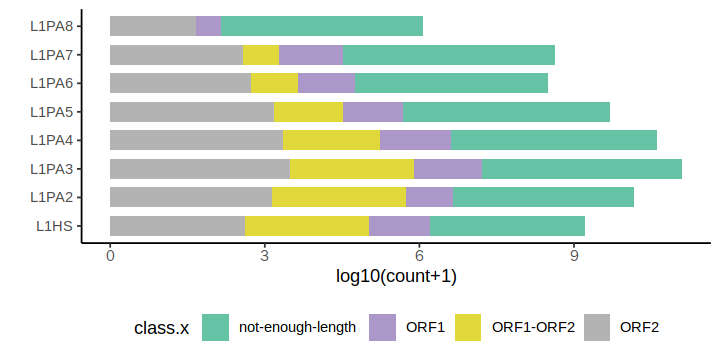

In [86]:
p

In [87]:
pdf('L1-count-subset.pdf',width = 6,height = 3)
p
dev.off()

png 
  2

In [105]:
head(gtf)

,transcriptID,location
,<chr>,<chr>
1,L1M2_dup229,chr1:100000001-100000637:-
2,AluSx3_dup157,chr1:10000002-10000239:+
3,L1M2_dup230,chr1:100000744-100002612:-
4,AluSx_dup700,chr1:10000251-10000566:+
5,AluJr_dup3513,chr1:100002613-100002913:-
6,L1M2_dup231,chr1:100002914-100003133:-


In [106]:
#这里想绘制，具有完整结构的L1s的长度是否具有某种偏好性；
#gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/hg38_rmsk_TE.gtf.locInd.locations",header=T)
gtff<-gtf %>% separate(location, c("chromsome","start","stop","strand"),sep = "[-|:]")
colnames(gtff)[1]<-"transcript"
gtff$start<-as.numeric(gtff$start)
gtff$stop<-as.numeric(gtff$stop)
gtff$length<-gtff$stop-gtff$start

Warning message:
“Expected 4 pieces. Additional pieces discarded in 2351491 rows [1, 3, 5, 6, 8,
9, 10, 11, 12, 13, 14, 15, 18, 20, 22, 27, 30, 32, 33, 35, ...].”


In [109]:
colnames(gtff)[1] <-c("transcriptID")

In [110]:
head(gtff)

,transcriptID,chromsome,start,stop,strand,length
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,L1M2_dup229,chr1,100000001,100000637,,636
2,AluSx3_dup157,chr1,10000002,10000239,+,237
3,L1M2_dup230,chr1,100000744,100002612,,1868
4,AluSx_dup700,chr1,10000251,10000566,+,315
5,AluJr_dup3513,chr1,100002613,100002913,,300
6,L1M2_dup231,chr1,100002914,100003133,,219


In [111]:
gtff$Length_label[gtff$length>6000] <-">6k"
gtff$Length_label[gtff$length<=6000 & gtff$length>4000 ] <-"4k-6k"
gtff$Length_label[gtff$length<=4000 & gtff$length>2000 ] <-"2k-4k"
#LengthDat_long$Length_label[2000<LengthDat_long$length< 4000] <-"2k-4k"
gtff$Length_label[gtff$length<= 2000] <-"<=2k"

In [112]:
head(gtff)

,transcriptID,chromsome,start,stop,strand,length,Length_label
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,L1M2_dup229,chr1,100000001,100000637,,636,<=2k
2,AluSx3_dup157,chr1,10000002,10000239,+,237,<=2k
3,L1M2_dup230,chr1,100000744,100002612,,1868,<=2k
4,AluSx_dup700,chr1,10000251,10000566,+,315,<=2k
5,AluJr_dup3513,chr1,100002613,100002913,,300,<=2k
6,L1M2_dup231,chr1,100002914,100003133,,219,<=2k


In [113]:
LengthGtf<-gtff[,c(1,7)]

In [114]:
head(LengthGtf)

,transcriptID,Length_label
,<chr>,<chr>
1,L1M2_dup229,<=2k
2,AluSx3_dup157,<=2k
3,L1M2_dup230,<=2k
4,AluSx_dup700,<=2k
5,AluJr_dup3513,<=2k
6,L1M2_dup231,<=2k


In [108]:
head(annotationDat)

,location,transcriptID,subfamily,class
,<chr>,<chr>,<chr>,<chr>
1,chr1_GL383518v1_alt:1-100:+,AluJo_dup78168,NA,not-enough-length
2,chr1_GL383518v1_alt:100662-100869:-,L1MB7_dup22832,NA,not-enough-length
3,chr1_GL383518v1_alt:100870-101167:-,AluSc8_dup21953,NA,not-enough-length
4,chr1_GL383518v1_alt:101168-101220:-,L1MB7_dup22833,NA,not-enough-length
5,chr1_GL383518v1_alt:101226-101443:-,AluJb_dup126187,NA,not-enough-length
6,chr1_GL383518v1_alt:10134-10440:-,AluSq2_dup61023,NA,not-enough-length


In [115]:
MergeDat<-merge(annotationDat,LengthGtf,by="transcriptID")

In [116]:
head(MergeDat)

,transcriptID,location,subfamily,class,Length_label
,<chr>,<chr>,<chr>,<chr>,<chr>
1,(CATTC)n,chr4:49091249-49112662:+,NA,not-enough-length,>6k
2,(CATTC)n_dup1,chr5:49666174-49667431:+,NA,not-enough-length,<=2k
3,(CATTC)n_dup10,chrY:11003171-11003370:+,NA,not-enough-length,<=2k
4,(CATTC)n_dup11,chrY:11014302-11014542:+,NA,not-enough-length,<=2k
5,(CATTC)n_dup12,chr18:46546273-46546655:+,NA,not-enough-length,<=2k
6,(CATTC)n_dup13,chr21:7942700-7957766:+,NA,not-enough-length,>6k


In [123]:
MergeDat2<-MergeDat %>% separate(transcriptID, c("subfamily","ID"),sep = "_")

Warning message:
“Expected 2 pieces. Additional pieces discarded in 123569 rows [1175462,
1175463, 1175464, 1175465, 1175466, 1175467, 1175468, 1175469, 1175470,
1175471, 1175472, 1175473, 1175474, 1175475, 1175476, 1175477, 1175478,
1175479, 1175480, 1175481, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1076 rows [1, 20, 56,
760, 846, 2706, 7364, 139123, 220498, 309001, 329967, 366305, 373323, 396351,
435032, 442635, 451794, 505603, 525469, 527634, ...].”


In [124]:
head(MergeDat2)

,subfamily,ID,location,class,Length_label
,<chr>,<chr>,<chr>,<chr>,<chr>
1,(CATTC)n,NA,chr4:49091249-49112662:+,not-enough-length,>6k
2,(CATTC)n,dup1,chr5:49666174-49667431:+,not-enough-length,<=2k
3,(CATTC)n,dup10,chrY:11003171-11003370:+,not-enough-length,<=2k
4,(CATTC)n,dup11,chrY:11014302-11014542:+,not-enough-length,<=2k
5,(CATTC)n,dup12,chr18:46546273-46546655:+,not-enough-length,<=2k
6,(CATTC)n,dup13,chr21:7942700-7957766:+,not-enough-length,>6k


In [125]:
MergeDat3<-MergeDat2%>% filter(subfamily%in%c("L1HS","L1PA2","L1PA3","L1PA4","L1PA5","L1PA6","L1PA7","L1PA8"))

In [126]:
MergeDatcount<-MergeDat3%>% count(Length_label,class,name = 'count')

In [131]:
MergeDatcount

Length_label,class,count
<fct>,<chr>,<int>
2k-4k,ORF1,27
2k-4k,ORF1-ORF2,17
2k-4k,ORF2,2672
2k-4k,not-enough-length,4779
4k-6k,ORF1,12
4k-6k,ORF1-ORF2,132
4k-6k,ORF2,1331
4k-6k,not-enough-length,1445
<=2k,ORF1,14


In [134]:
#CountTable2<-CountTable%>% filter(gene%in%c("L1HS","L1PA2","L1PA3","L1PA4","L1PA5","L1PA6","L1PA7","L1PA8"))
MergeDatcount$Length_label<-factor(MergeDatcount$Length_label,levels=c("<=2k","2k-4k","4k-6k",">6k"))
library(RColorBrewer)
colourCount <-  length(unique(MergeDatcount$class))
options(repr.plot.width =6, repr.plot.height =3)
p<-ggplot(MergeDatcount, aes(Length_label,count,fill = class))+
    geom_col(position = 'stack', width = 0.7) +
    labs(x = '', y = 'count') +
    theme(axis.text = element_text(size = 12), axis.title = element_text(size = 13)) +
    theme(legend.text = element_text(size = 11))+
    theme_classic()+
    scale_fill_manual(values = colorRampPalette(brewer.pal(8, "Set2"))(colourCount))+
    theme(legend.position = "bottom" ,legend.box = "horizontal")+
    coord_flip()

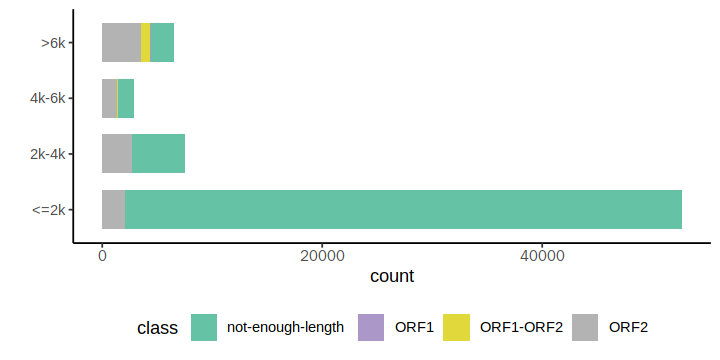

In [135]:
p

In [136]:
pdf('L1-count-length-noLog10.pdf',width = 6,height = 3)
p
dev.off()

png 
  2

In [130]:
pdf('L1-count-length.pdf',width = 6,height = 3)
p
dev.off()

png 
  2

In [45]:
StructureDat_long <- gather(StructureDat, key = "sample", value = "expression",
                    -`transcriptID`,-`location`, -`subfamily`, -`class.x`, -`gene` ,-`family`, -`class.y`)

In [46]:
head(StructureDat_long)

,transcriptID,location,subfamily,class.x,gene,family,class.y,sample,expression
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,HAL1,chr1:50331337-50332274:+,NA,not-enough-length,HAL1,L1,LINE,ESC-1,0
2,HAL1_dup1,chr1:114294733-114297115:+,NA,not-enough-length,HAL1,L1,LINE,ESC-1,0
3,HAL1_dup10,chr1:1130956-1131376:-,NA,not-enough-length,HAL1,L1,LINE,ESC-1,0
4,HAL1_dup100,chr1:14842757-14843163:-,NA,not-enough-length,HAL1,L1,LINE,ESC-1,0
5,HAL1_dup1000,chr1:150866514-150866665:+,NA,not-enough-length,HAL1,L1,LINE,ESC-1,0
6,HAL1_dup10000,chr7:29781941-29781976:+,NA,not-enough-length,HAL1,L1,LINE,ESC-1,0


In [47]:
options(repr.plot.width =12, repr.plot.height =4)

In [48]:
p <- ggplot(StructureDat_long,
            aes(sample,log10(expression+1),fill = class.x)) +
       geom_boxplot(color="lightgrey")+
       theme_classic()+
           scale_fill_brewer(palette="BuGn")

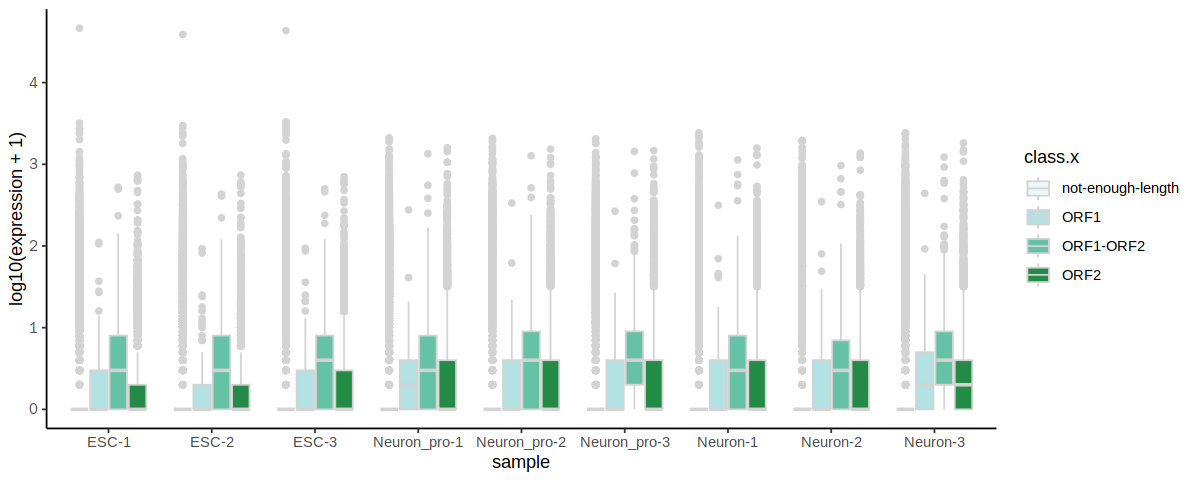

In [49]:
p #这张图，就是我一直想要的结果；

In [50]:
pdf('L1-structure.pdf',width = 10,height = 4)
p
dev.off()

png 
  2